In [0]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade nltk
!pip install --upgrade matplotlib
%matplotlib inline

     |████████████████████████████████| 7.0MB 9.4MB/s 
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
     |████████████████████████████████| 20.1MB 211kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.4
    Uninstalling numpy-1.17.4:
      Successfully uninstalled numpy-1.17.4


     |████████████████████████████████| 26.1MB 174kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.3
    Uninstalling scipy-1.3.3:
      Successfully uninstalled scipy-1.3.3
     |████████████████████████████████| 1.5MB 8.4MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449907 sha256=6188342d97942df7c5d85a87a720a9fb193baa4052b94d22ec7b6bcaa322655a
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.1.2)



# Εξόρυξη κειμένου (Text Mining)

To Text Mining είναι ένα σύνολο αυτόματων (μηχανικών) τεχνικών που στοχεύουν στην εξαγωγή υψηλής ποιότητας πληροφορίας από κειμενική πληροφορία. Ο ασυμπτωτικός ορίζοντας του text mining είναι η συνολική σημασιολογική κατανόηση του ανθρώπινου λόγου, κάτι όμως που ανήκει στους δύσκολους στόχους της λεγόμενης **Ισχυρής Τεχνητής Νοημοσύνης** (*Strong AI*). Στο δρόμο για την επίτευξη αυτού του στόχου η έρευνα στο text mining επικεντρώνεται σε μια σειρά πιο συγκεκριμένων και άρα περισσότερο προσιτών στόχων - tasks (*Weak AI*) όπως (μεταξύ άλλων):
- **Κατηγοριοποίηση κειμένων** (*text categorization*) - Ταξινόμηση με βάση το περιεχόμενο σε συγκεκριμένες θεματικές κατηγορίες
- **Ομαδοποίηση** (*text clustering*) - Ομαδοποιήση "κοντινών" σημασιολογικά κειμένων
- **Εξαγωγή θεμάτων** (*topic extraction*) - Ανακάλυψη των θεμάτων που περιέχει ένα κείμενο
- **Εξαγωγή εννοιών και οντοτήτων** (*concept/entity extraction*) - Σε ποιες έννοιες και οντότητες του φυσικού κόσμου αναφέρεται το κείμενο.
- **Ανάλυση συναισθήματος** (*sentiment analysis*) - Χαρακτηρισμός του συναισθήματος
- **Αυτόματη περίληψη** (*document summarization*) - Δημιουργία αυτόματης περίληψης
- **Μοντελοποιηση σχέσεων μεταξύ οντοτήτων** (*entity relation modeling*) - Ποιες σχέσεις διέπουν τις οντότητες που εντοπίζονται εντός του κειμένου.
- **Απάντηση ερωτήσεων** *(question answering*) - απάντηση ερώτησης και τα δύο σε φυσική γλώσσα


Στην εξόρυξη κειμένου συνδυάζονται τεχνικές και προσεγγίσεις που προέρχονται από τη θεωρία της πληροφορίας και τη στατιστική, την αναγνώριση προτύπων, την εξόρυξη δεδομένων, τη μηχανική μάθηση, την ανάκτηση πληροφορίας, την επεξεργασία φυσικής γλώσσας (Natural Language Processing - NLP), τη γλωσσολογία, την αναπαράσταση γνώσεων, τις οντολογίες κ.α.

Για την εξόρυξη κειμένου και την επεξεργασία φυσικής γλώσσας θα βασιστούμε στο [Natural Language Toolkit](http://www.nltk.org/) της Python

Περισσότερα θα δείτε στο [nltk book](http://www.nltk.org/book/)

In [0]:
import numpy as np
import nltk

## Εισαγωγή κειμένων στο notebook


Το NLTK από μόνο του έχει μόνο τις πολύ βασικές λειτουργίες. Για πιο σύνθετα πράγματα (τα οποία θα χρειαστούμε) χρειάζεται να κατεβάσουμε επιπλέον δυνατότητες της βιβλιοθήκες. Όταν τρέχουμε τοπικά την Python, αυτό μπορούμε να το κάνουμε μέσω της εντολής `nltk.download()`, η οποία ανοίγει ένα παράθυρο όπου επιλέγουμε ποιες λειτουργίες μας ενδιαφέρει να κατεβάσουμε. Σε κάποιες cloud πλατφόρμες αυτό δεν είναι δυνατό, γι' αυτό πρέπει να τα κατεβάζουμε ένα ένα τα επιπλέον πακέτα, όπως θα δούμε παρακάτω.



### Από βιβλιοθήκες της Python

Στα πλαίσια της άσκησης θα χρησιμοποιήσουμε το [reuters dataset](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection). 

Το σώμα (corpus) κειμένων Reuters περιέχει 10788 κείμενα ειδήσεων. Κάθε κείμενο (document) ανήκει σε μία ή περισσότερες από 90 θεματικές κατηγορίες ειδήσεων που έχουν να κάνουν κυρίως με εμπορικά και χρηματιστηριακά αγαθά και υπηρεσίες (πχ "fuel", "cotton", "ship" κλπ). To Reuters είναι ήδη χωρισμένο σε train και test set.
Μπορουμε να εισάγουμε το Reuters μέσω του NLTK:


In [0]:
nltk.download('reuters') # κατεβάζουμε το dataset

from nltk.corpus import reuters # το κάνουμε import


[nltk_data] Downloading package reuters to /root/nltk_data...



και τυπώνουμε κάποια βασικά χαρακτηριστικά:



In [0]:
def collection_stats():
    # List of documents
    documents = reuters.fileids()
    print(str(len(documents)) + " documents");
 
    train_docs = list(filter(lambda doc: doc.startswith("train"),
                        documents));
    print(str(len(train_docs)) + " total train documents");
 
    test_docs = list(filter(lambda doc: doc.startswith("test"),
                       documents));
    print(str(len(test_docs)) + " total test documents");
 
    # List of categories
    categories = reuters.categories();
    print(str(len(categories)) + " categories");

collection_stats()
print(reuters.categories()[:20], '...')

10788 documents
7769 total train documents
3019 total test documents
90 categories
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr'] ...


Για ένα τυχαίο document μπορούμε να δούμε τις κατηγορίες που ανήκει και το ίδιο το κείμενο χρησιμοποιώντας το id του:

In [0]:
def describe_doc(document_id):
    # Raw categories
    print("Categories")
    doc_categories = reuters.categories(document_id) 
    print(doc_categories)
    # Raw document
    print("Document")
    print(reuters.raw(document_id));

doc_id = 'training/9880'
describe_doc(doc_id)
doc_id = 'training/9865'
describe_doc(doc_id)


Categories
['money-fx']
Document
U.K. MONEY MARKET GETS 25 MLN STG LATE HELP
  The Bank of England said it provided
  about 25 mln stg in late help to the money market, bringing the
  total assistance today to 266 mln stg.
      This compares with the bank's revised estimate of a 350 mln
  stg money market shortfall.
  


Categories
['barley', 'corn', 'grain', 'wheat']
Document
FRENCH FREE MARKET CEREAL EXPORT BIDS DETAILED
  French operators have requested licences
  to export 675,500 tonnes of maize, 245,000 tonnes of barley,
  22,000 tonnes of soft bread wheat and 20,000 tonnes of feed
  wheat at today's European Community tender, traders said.
      Rebates requested ranged from 127.75 to 132.50 European
  Currency Units a tonne for maize, 136.00 to 141.00 Ecus a tonne
  for barley and 134.25 to 141.81 Ecus for bread wheat, while
  rebates requested for feed wheat were 137.65 Ecus, they said.
  




Το Reuters χρησιμοποιείται συχνά για την μελέτη της απόδοσης αλγορίθμων Μηχανικής Μάθησης στην κατηγοριοποίηση ή ομάδοποιήση κειμένων.

### Από το internet

Σημείωση: Ο παρακάτω κώδικας δεν θα τρέξει στο περιβάλλον του Microsoft Azure. Ο λόγος είναι ότι το Azure δεν επιτρέπει την πρόσβαση σε εξωτερικά URLs για να αποφύγει τη χρήση των notebooks σε denial of service (DoS) attacks. Μπορείτε να τον τρέξετε τοπικά στον υπολογιστή σας.

In [0]:
import urllib

# ορίζουμε το url που περιέχει το κείμενο (εδώ το Moby Dick)
url = 'https://www.mirrorservice.org/sites/ftp.ibiblio.org/pub/docs/books/gutenberg/2/7/0/2701/2701-0.txt'

with urllib.request.urlopen(url) as response:
   raw = response.read()

#τυπώνουμε ένα κομμάτι του κειμένου
text_chunk=raw[10000:11000]
print(text_chunk)

b's, and perisheth in the\r\n  bottomless gulf of his paunch.\xe2\x80\x9d \xe2\x80\x94_Holland\xe2\x80\x99s Plutarch\xe2\x80\x99s Morals_.\r\n\r\n  \xe2\x80\x9cThe Indian Sea breedeth the most and the biggest fishes that are:\r\n  among which the Whales and Whirlpooles called Balaene, take up as\r\n  much in length as four acres or arpens of land.\xe2\x80\x9d \xe2\x80\x94_Holland\xe2\x80\x99s Pliny_.\r\n\r\n  \xe2\x80\x9cScarcely had we proceeded two days on the sea, when about sunrise a\r\n  great many Whales and other monsters of the sea, appeared. Among the\r\n  former, one was of a most monstrous size.... This came towards us,\r\n  open-mouthed, raising the waves on all sides, and beating the sea\r\n  before him into a foam.\xe2\x80\x9d \xe2\x80\x94_Tooke\xe2\x80\x99s Lucian_. \xe2\x80\x9c_The True History_.\xe2\x80\x9d\r\n\r\n\r\n\r\n\r\n  \xe2\x80\x9cHe visited this country also with a view of catching horse-whales,\r\n  which had bones of very great value for their teeth, of whi

Το κείμενο είναι σε κωδικοποίηση Unicode UTF-8. Θα το μετατρέφουμε σε εκτυπώσιμους χαρακτήρες.

In [0]:
s = text_chunk.decode('utf-8')
print(s)

s, and perisheth in the
  bottomless gulf of his paunch.” —_Holland’s Plutarch’s Morals_.

  “The Indian Sea breedeth the most and the biggest fishes that are:
  among which the Whales and Whirlpooles called Balaene, take up as
  much in length as four acres or arpens of land.” —_Holland’s Pliny_.

  “Scarcely had we proceeded two days on the sea, when about sunrise a
  great many Whales and other monsters of the sea, appeared. Among the
  former, one was of a most monstrous size.... This came towards us,
  open-mouthed, raising the waves on all sides, and beating the sea
  before him into a foam.” —_Tooke’s Lucian_. “_The True History_.”




  “He visited this country also with a view of catching horse-whales,
  which had bones of very great value for their teeth, of which he
  brought some to the king.... The best whales were catched in his own
  country, of which some were forty-eight, some fifty yards long. He
  said that he was one


### Από τοπικό αρχείο 

Έστω ότι έχω ένα αρχείο στον υπολογιστή μου με όνομα `mydoc.txt`. Αυτό πρέπει πρώτα να το ανεβάσουμε στο περιβάλλον του notebook με έναν από τους τρόπους που περιγράφονται στο notebook "Read CSV from file or URL to DataFrame ALL CLOUDS.ipynb" που βρίσκεται στο mycourses και είναι διαφορετικός ανάλογα το cloud.

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
!ls

mydoc.txt  sample_data


Διαβάζω το περιεχόμενο του αρχείο μέσα στο string "document"

In [0]:
with open('mydoc.txt', 'r') as f:
    document = ''
    for line in f:
        document += line

print(document)

Commerce Secretary Malcolm Baldrige
said he supported efforts to persuade newly-industrialized
countries (NICS) to revalue currencies that are tied to the
dollar in order to help the United States cut its massive trade
deficit.
    "We do need to do something with those currencies or we
will be substituting Japanese products for Taiwanese products,"
or those of other nations with currencies tied to the dollar,
Baldrige told a House banking subcommittee.
    The U.S. dollar has declined in value against the Yen and
European currencies, but has changed very little against the
currencies of some developing countries such as South Korea and
Taiwan because they are linked to the value of the dollar.
    As a result, efforts to reduce the value of the dollar over
the past year and a half have done little to improve the trade
deficits with those countries.
    Baldrige told a House Banking subcommittee that the
Treasury Department was attempting to persuade those countries
to reach agreement 

## Μοντέλο διανυσματικού χώρου (Vector Space Model)

Ως σημείο εκκίνησης λαμβάνουμε ότι διαθέτουμε μια συλλογή από κείμενα (αρχεία text) και ότι οι αλγόριθμοι μηχανικής μάθησης που χρησιμοποιουμε λαμβάνουν στην είσοδο αριθμητικές τιμές (διανύσματα). Ένα πρώτο και πολύ βασικό ερώτημα λοιπόν είναι πως μπορούμε να μετατρέψουμε τα κείμενα σε κατάλληλη διανυσματική μορφή. Τί θα αποτελούσε όμως "κατάλληλη διανυσματική μορφή";

Μια απάντηση που μπορούμε να δώσουμε από την υπολογιστική σκοπιά είναι ότι αν κάθε κείμενο της συλλογής μετατραπεί σε ένα διάνυσμα, θα θέλαμε η μετατροπή αυτή να κρατήσει τη σημασιολογική πληροφορία των κειμένων έτσι ώστε κείμενα που το κειμενικό τους περιεχόμενο είναι σημασιολογικά "κοντινό" (μιλάνε για κοντινά θέματα) να αντιστοιχούν σε σημεία του διανυσματικού χώρου αναπαράστασης που είναι κονά μεταξύ τους και το αντίστροφο για κείμενα με ανόμοιο περιεχόμενο.



### Σάκος λέξεων (bag of words)

Ας θεωρήσουμε χωρίς βλάβη της γενικότητας την ακόλουθη μικρή συλλογή κειμένων (documents): 

d1 = "a big black cat"

d2 = "a cat and a dog"

d3 = "a lovely town"

Τα d1 και d2 έχουν μεταξύ τους κοινό σημασιολογικό περιεχόμενο και δεν έχουν με το d3. Κατασκευάζουμε ένα διάνυσμα του οποίου κάθε χαρακτηριστικό είναι κάθέ μοναδική λέξη της συλλογής μας σε αλφαβητική σειρά δηλαδή:

\[ a and big black cat dog lovely town \]

Με βάση αυτό τα 8 χαρακτηριστικά τώρα, αναπαριστούμε κάθε document με ένα διάνυσμα όπου τα χαρακτηριστικά λαμβάνουν τιμές ίσες με τη συχνότητα εμφάνισης της κάθε λέξης (term frequency) στο συγκεκριμένο document: 

d1 = \[ 1 0 1 1 1 0 0 0 \]

d2 = \[ 2 1 0 0 1 1 0 0 \]

d3 = \[ 1 0 0 0 0 0 1 1 \]

Αυτή είναι το βασικό μοντέλο (αναπαράστασης) διανυσματικού χώρου που χρησιμοποιεί τις συχνότητες εμφάνισης κάθε λέξης. Εξαιτίας του γεγονότος ότι αγνοούμε τη σειρά των λέξεων (το "a big black cat" έχει την ίδια διανυσματική αναπαράσταση με το "cat big a black") το ονομάζουμε σάκο λέξεων - bag of words (BOW). 

Ας τα περάσουμε στο numpy και να δοκιμάσουμε να υπολογίσουμε αποστάσεις μεταξύ διανυσμάτων:

In [0]:
d1 = np.array([1,0,1,1,1,0,0,0])
d2 = np.array([2,1,0,0,1,1,0,0])
d3 = np.array([1,0,0,0,0,0,1,1])

#Ευκλείδεια απόσταση

d1d2 = print("d1 με d2", np.linalg.norm(d1-d2))
d1d3 = print("d1 με d3", np.linalg.norm(d1-d3))
d2d3 = print("d2 με d3", np.linalg.norm(d2-d3))

d1 με d2 2.23606797749979
d1 με d3 2.23606797749979
d2 με d3 2.449489742783178


Συνεπώς βλέπουμε ότι ακόμα δεν έχουμε πετύχει αυτό που θέσαμε ως αρχικό στόχο, τα d1 και d2 να είναι πιο κοντά μεταξύ τους απότι είνα με το d3. Στην πράξη δεν χρησιμοποιούμε την ευκλείδεια απόσταση γιατί για παράδειγμα αν πάρουμε το

d4 = "a big black cat a big black cat"

που δεν έχει καμία σημασιολογική μονάδα πληροφορίας (λέξη) διαφορετική από το d1 (και άρα θα έπρεπε να έχει απόσταση 0) το οποίο έχει  διανυσματική αναπαράσταση το διπλάσιο του d1

d4 = \[ 2 0 2 2 2 0 0 0 \]

Με ευκλείδια απόσταση θα λάβουμε:

In [0]:
d4 = np.array([2,0,2,2,2,0,0,0])
d1d4 = print("d1 με d4", np.linalg.norm(d1-d4))

d1 με d4 2.0


### Ομοιότητα συνημιτόνόυ (cosine similarity)

Για το λόγο αυτό, στο Vector Space Model χρησιμοποιούμε την απόσταση (ή ομοιότητα) συνημιτόνόυ (cosine similarity): 

$ {\text{similarity}}=\cos(\theta )={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|\|\mathbf {B} \|}={\frac {\sum \limits _{i=1}^{n}{A_{i}B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{A_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{B_{i}^{2}}}}}}$


In [0]:
import scipy as sp

cosd1d4 = sp.spatial.distance.cosine(d1, d4)
print(cosd1d4)

0.0


και αντίστοιχα:

In [0]:
cosd1d2 = sp.spatial.distance.cosine(d1, d2)
cosd1d3 = sp.spatial.distance.cosine(d1, d3)
cosd2d3 = sp.spatial.distance.cosine(d2, d3)

print("d1 με d2", cosd1d2)
print("d1 με d3", cosd1d3)
print("d2 με d3", cosd2d3)

d1 με d2 0.43305329048615915
d1 με d3 0.7113248654051871
d2 με d3 0.5635642195280153


Η ομοιότητα (απόσταση) συνημιτόνου κανονικοποιεί με βάση τις νόρμες (μήκος) των κειμένων (άρα δεν έχουμε διανύσματα διαφορετικών μηκών) και είναι 1 (0) για διανύσματα που έχουν ακριβώς την ίδια "γωνία" στον υπερχώρο διαστάσεων Ν (o αριθμός των μοναδικών λέξεων) του vector space model.

<!-- http://blog.christianperone.com/wp-content/uploads/2013/09/vector_space.png -->
![Imgur](https://i.imgur.com/Kl6MFc8.png)



## Μετατροπή κειμένων σε διανύσματα


Στη συνέχεια παρουσιάζουμε μερικά κλασικά βήματα που χρησιμοποιούμε για τη μετατροπή των κειμένων σε διανύσματα στο VSM. Τα βήματα αυτά περιλαμβάνουν κάποιες βελτιώσεις σε σχέση με το βασικό μοντέλο.

Επειδή αν έχουμε μια μεγάλη συλλογή κειμένων το να λάβουμε όλες τις μοναδικές λέξεις ως χαρακτηριστικά του VSM μπορεί να οδηγήσει σε πάρα πολύ μεγάλες διαστάσεις, είναι βασικό μας μέλημα να χρησιμοποιούμε διάφορες τεχνικές ώστε να περιορίζουμε όσο είναι δυνατό αυτή τη διαστατικότητα χωρίς να χάνουμε περιεχόμενο (σημασία). 

### Προεπεξεργασία κειμένου

Τώρα που φορτώσαμε το κείμενο στην python, πρέπει να το επεξεργαστούμε. Επειδή ο υπολογιστής θεωρεί τα κεφαλαία και τα μικρά ως διαφορετικούς χαρακτήρες, το πρώτο πράγμα που πρέπει να κάνουμε είναι να τα κάνουμε **όλα πεζά**. Έπειτα θέλουμε να **χωρίσουμε τις λέξεις μια προς μια**, ώστε να φτιάξουμε μια λίστα τα στοιχεία της οποίας θα είναι οι λέξεις.

In [0]:
document = document.lower()

nltk.download('punkt') # χρειάζεται για το tokenizer
words = nltk.word_tokenize(document)

print(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['commerce', 'secretary', 'malcolm', 'baldrige', 'said', 'he', 'supported', 'efforts', 'to', 'persuade', 'newly-industrialized', 'countries', '(', 'nics', ')', 'to', 'revalue', 'currencies', 'that', 'are', 'tied', 'to', 'the', 'dollar', 'in', 'order', 'to', 'help', 'the', 'united', 'states', 'cut', 'its', 'massive', 'trade', 'deficit', '.', '``', 'we', 'do', 'need', 'to', 'do', 'something', 'with', 'those', 'currencies', 'or', 'we', 'will', 'be', 'substituting', 'japanese', 'products', 'for', 'taiwanese', 'products', ',', "''", 'or', 'those', 'of', 'other', 'nations', 'with', 'currencies', 'tied', 'to', 'the', 'dollar', ',', 'baldrige', 'told', 'a', 'house', 'banking', 'subcommittee', '.', 'the', 'u.s.', 'dollar', 'has', 'declined', 'in', 'value', 'against', 'the', 'yen', 'and', 'european', 'currencies', ',', 'but', 'has', 'changed', 'very', 'little', 'against', 'the', 'currencies', 'of', 'some', 'developing', 'countries', 'such', 'as', 'south', 'korea', 'and', 'taiwan', 'because', 'th

Το tokenizer ουσιαστικά κάνει ό,τι και η built-in μέθοδος `.split()` των string, αλλά λίγο πιο έξυπνα. Για αρχή χωρίζει με βάση τόσο τα κενά (`' '`), όσο και τα tabs (`'\t'`) και τα new lines (`'\n'`). Επίσης όπως μπορούμε να δούμε και παραπάνω χωρίζει και τις παρενθέσεις από το περιεχόμενό τους.

Το επόμενο βήμα είναι να διαγράψουμε από τη λίστα μας τα **σημεία στίξης**. Μόλις το κάνουμε αυτό, θέλουμε να διαγράψουμε και μερικές συχνά χρησιμοποιούμενες λέξεις που δεν προσφέρουν σημασιολογική αξία στο κείμενο (**stopwords**).  Τυπικά stopwotds στα αγγλικά είναι λέξεις όπως "the", "a", "to", "and", "he", "she" κοκ.

In [0]:
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά
from nltk.corpus import stopwords
import string

'''
filtered_words = [word for word in words if word not in list(string.punctuation)] # το string.punctuation είναι απλά ένα
                                                                                  # string που περιέχει όλα τα σημεία στίξης

filtered_words = [word for word in filtered_words if word not in stopwords.words('english')] # το stopwords.words('english')
                                                                                             # είναι μια λίστα που περιέχει
                                                                                             # stopwords στα αγγλικά
'''
filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation)]

print(filtered_words)

['commerce', 'secretary', 'malcolm', 'baldrige', 'said', 'supported', 'efforts', 'persuade', 'newly-industrialized', 'countries', 'nics', 'revalue', 'currencies', 'tied', 'dollar', 'order', 'help', 'united', 'states', 'cut', 'massive', 'trade', 'deficit', '``', 'need', 'something', 'currencies', 'substituting', 'japanese', 'products', 'taiwanese', 'products', "''", 'nations', 'currencies', 'tied', 'dollar', 'baldrige', 'told', 'house', 'banking', 'subcommittee', 'u.s.', 'dollar', 'declined', 'value', 'yen', 'european', 'currencies', 'changed', 'little', 'currencies', 'developing', 'countries', 'south', 'korea', 'taiwan', 'linked', 'value', 'dollar', 'result', 'efforts', 'reduce', 'value', 'dollar', 'past', 'year', 'half', 'done', 'little', 'improve', 'trade', 'deficits', 'countries', 'baldrige', 'told', 'house', 'banking', 'subcommittee', 'treasury', 'department', 'attempting', 'persuade', 'countries', 'reach', 'agreement', 'united', 'states', 'exchange', 'rates']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Πρέπει να κάνουμε καλύτερη δουλειά στην αφαίρεση των σημείων στίξης γιατί δεν αφαιρούνται οι λέξεις που περιέχουν περισσότερα από ένα τέτοια σημεία.

In [0]:
def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words
        
filtered_words = thorough_filter(filtered_words)
print(filtered_words)

['commerce', 'secretary', 'malcolm', 'baldrige', 'said', 'supported', 'efforts', 'persuade', 'newly-industrialized', 'countries', 'nics', 'revalue', 'currencies', 'tied', 'dollar', 'order', 'help', 'united', 'states', 'cut', 'massive', 'trade', 'deficit', 'need', 'something', 'currencies', 'substituting', 'japanese', 'products', 'taiwanese', 'products', 'nations', 'currencies', 'tied', 'dollar', 'baldrige', 'told', 'house', 'banking', 'subcommittee', 'u.s.', 'dollar', 'declined', 'value', 'yen', 'european', 'currencies', 'changed', 'little', 'currencies', 'developing', 'countries', 'south', 'korea', 'taiwan', 'linked', 'value', 'dollar', 'result', 'efforts', 'reduce', 'value', 'dollar', 'past', 'year', 'half', 'done', 'little', 'improve', 'trade', 'deficits', 'countries', 'baldrige', 'told', 'house', 'banking', 'subcommittee', 'treasury', 'department', 'attempting', 'persuade', 'countries', 'reach', 'agreement', 'united', 'states', 'exchange', 'rates']


### Stemming & Lemmatization

Για γραμματικούς λόγους, τα κείμενα χρησιμοποιούν διαφορετικές μορφές μιας λέξης, όπως π.χ. *play*, *plays*, *playing*, *played*. Αυτό έχει σαν αποτέλεσμα πως, ενώ αναφερόμαστε σε κάποιο παρόμοιο σημασιολογικό περιεχόμενο, ο υπολογιστής τις καταλαβαίνει ως διαφορετικές και προσθέτει διαστάσεις στην αναπαράσταση. Για να λύσουμε αυτό το πρόβλημα, μπορούμε να χρησιμοποιήσουμε δύο γλωσσολογικούς μετασχηματισμούς, είτε την αφαίρεση της κατάληξης (stemming), είτε τη λημματοποίηση (lemmatization). Ο στόχος, τόσο της αφαίρεσης κατάληξης όσο και της λημματοποίησης, είναι να φέρουν τις διάφορες μορφές της λέξης σε μια κοινή μορφή βάσης. Πιο συγκεκριμένα:

Η **αφαίρεση της κατάληξης** αναφέρεται σε μια ακατέργαστη ευριστική διαδικασία που απομακρύνει τα άκρα των λέξεων με την ελπίδα να επιτύχει αυτό το στόχο σωστά τις περισσότερες φορές.

Η **λημματοποίηση** αναφέρεται στην απομάκρυνση της κλίσης των λέξεων και στην επιστροφή της μορφής της λέξης όπως θα τη βρίσκαμε στο λεξικό, με τη χρήση λεξιλογίου και μορφολογικής ανάλυσης των λέξεων. Η μορφή αυτή είναι γνωστή ως λήμμα (*lemma*).

In [0]:
nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
nltk.download('rslp')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

lem_words = [wordnet_lemmatizer.lemmatize(word) for word in filtered_words]
stem_words = [porter_stemmer.stem(word) for word in filtered_words]

print('\n{:<20} {:<20} {:<20}'.format('Original', 'Stemmed', 'Lemmatized'))
print('-'*60)
for i in range(len(filtered_words)):
    print('{:<20} {:<20} {:<20}'.format(filtered_words[i], stem_words[i], lem_words[i]))


Original             Stemmed              Lemmatized          
------------------------------------------------------------
commerce             commerc              commerce            
secretary            secretari            secretary           
malcolm              malcolm              malcolm             
baldrige             baldrig              baldrige            
said                 said                 said                
supported            support              supported           
efforts              effort               effort              
persuade             persuad              persuade            
newly-industrialized newly-industri       newly-industrialized
countries            countri              country             
nics                 nic                  nics                
revalue              revalu               revalue             
currencies           currenc              currency            
tied                 tie                  tied          

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


**Προσοχή:** χρησιμοποιούμε είτε stemming (πιο συχνά), είτε lemmatization, αλλά όχι και τα δύο μαζί. Το πρώτο βελτιώνει την ανάκληση, το δεύτερο την ακρίβεια.

Αφότου έχουμε ολοκληρώσει τις γλωσσολογικές προεπεξεργασίες, θα ορίσουμε μια μικρή συλλογή κειμένων ώστε να προχωρήσουμε ένα παράδειγμα ομαδοποίησης  κειμένων. 

Όπως βλέπουμε παρακάτω τα πρώτα δύο και τα τελευταία δύο κείμενα βρίσκονται  σημασιολογικά κοντά μεταξύ τους.

In [0]:
# Το νέο σύνολο κειμένων μας
documents = ["Lionel Messi is the best football player in the world! Messi plays for Barcelona Football Club. Barcelona Football Club plays in the Spanish Primera Division.",
            "Lionel Messi a football player, playing for Barcelona Football Club, a Spanish football team.", 
            "Barcelona is a city in a northern spanish province called Catalonia. It is the largest city in Catalonia and the second most populated spanish city.", 
            "Python is a programming language. Python is an object-oriented programming language. Unlike COBOL, Python is a interpreted programming language.", 
            "COBOL is a compiled computer programming language designed for business use. This programming language is imperative, procedural and, since 2002, object-oriented. But Python is better."]


Κάνουμε τη γνωστή μας προεπεξεργασία και τυπώνουμε τη συχνότητα κάθε token σε κάθε document.

In [0]:
import collections

def preprocess_document(document):
    # όλα τα προηγούμενα βήματα που κάναμε μέχρι στιγμής
    words = nltk.word_tokenize(document.lower())
    filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation)]
    filtered_words = thorough_filter(filtered_words)
    stemmed_words = [porter_stemmer.stem(wordnet_lemmatizer.lemmatize(word)) for word in filtered_words]
    cnt = collections.Counter(stemmed_words)
    return cnt

preprocessed_documents = [preprocess_document(doc) for doc in documents]

for doc in preprocessed_documents:
    print(doc)

Counter({'footbal': 3, 'messi': 2, 'play': 2, 'barcelona': 2, 'club': 2, 'lionel': 1, 'best': 1, 'player': 1, 'world': 1, 'spanish': 1, 'primera': 1, 'divis': 1})
Counter({'footbal': 3, 'lionel': 1, 'messi': 1, 'player': 1, 'play': 1, 'barcelona': 1, 'club': 1, 'spanish': 1, 'team': 1})
Counter({'citi': 3, 'spanish': 2, 'catalonia': 2, 'barcelona': 1, 'northern': 1, 'provinc': 1, 'call': 1, 'largest': 1, 'second': 1, 'popul': 1})
Counter({'python': 3, 'program': 3, 'languag': 3, 'object-ori': 1, 'unlik': 1, 'cobol': 1, 'interpret': 1})
Counter({'program': 2, 'languag': 2, 'cobol': 1, 'compil': 1, 'comput': 1, 'design': 1, 'busi': 1, 'use': 1, 'imper': 1, 'procedur': 1, 'sinc': 1, '2002': 1, 'object-ori': 1, 'python': 1, 'better': 1})


Μια τυπική μέθοδος μείωσης της διασταστικότητας είναι να πετάμε τους πάρα πολύ συχνούς όρους, τους πάρα πολύ σπάνιους ή τους όρους που εμφανίζονται σε πολύ λίγα documents (μιλάμε πάντα για το σύνολο της συλλογής, όχι τα μεμονωμένα documents).

Στο μικρό αυτό dataset αποφασίζουμε να πετάξουμε τους όρους που εμφανίζονται μόνο μία φορά στο σύνολο της συλλογής

In [0]:
threshold = 1

total_counter = preprocessed_documents[0]
for i in range(1, len(preprocessed_documents)):
    total_counter += preprocessed_documents[i] # counter που περιέχει τα συνολικά αθροίσματα σε όλα τα κείμενα

print(total_counter, '\n')

vocabulary = [word for word in total_counter if total_counter[word] > threshold] # κρατάμε μόνο τους όρους με συχνότητα εμφάνισης πάνω από το κατώφλι

print(vocabulary)

Counter({'footbal': 6, 'program': 5, 'languag': 5, 'barcelona': 4, 'spanish': 4, 'python': 4, 'messi': 3, 'play': 3, 'club': 3, 'citi': 3, 'lionel': 2, 'player': 2, 'catalonia': 2, 'object-ori': 2, 'cobol': 2, 'best': 1, 'world': 1, 'primera': 1, 'divis': 1, 'team': 1, 'northern': 1, 'provinc': 1, 'call': 1, 'largest': 1, 'second': 1, 'popul': 1, 'unlik': 1, 'interpret': 1, 'compil': 1, 'comput': 1, 'design': 1, 'busi': 1, 'use': 1, 'imper': 1, 'procedur': 1, 'sinc': 1, '2002': 1, 'better': 1}) 

['lionel', 'messi', 'footbal', 'player', 'play', 'barcelona', 'club', 'spanish', 'citi', 'catalonia', 'python', 'program', 'languag', 'object-ori', 'cobol']


Για την ευκολία μας θα δημιουργήσουμε έναν πίνακα που στις γραμμές του θα έχει τα documents και στις στήλες του τις λέξεις και θα αποθηκεύσουμε μέσα σε αυτόν τον αριθμό εμφάνισης των όρων. 

In [0]:
freq_array = np.zeros((len(preprocessed_documents), len(vocabulary)))

for i in range(len(preprocessed_documents)):
    for j in range(len(vocabulary)):
        freq_array[i,j] += preprocessed_documents[i][vocabulary[j]] 

print(vocabulary, '\n')
print(freq_array)

['lionel', 'messi', 'footbal', 'player', 'play', 'barcelona', 'club', 'spanish', 'citi', 'catalonia', 'python', 'program', 'languag', 'object-ori', 'cobol'] 

[[2. 3. 6. 2. 3. 4. 3. 4. 3. 2. 4. 5. 5. 2. 2.]
 [1. 1. 3. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 2. 3. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 3. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 2. 1. 1.]]


### TF-IDF

Η αναπράσταση στο VSM μόνο με τις συχνότητες εμφάνισης κάθε όρου δεν είναι βέλτιση. Στην πράξη χρησιμοποιούμε το **TF-IDF** (Term Frequency - Inverse Document Frequency).

Όπως προσδίδει και το όνομά του, το tf-idf αποτελείται από 2 όρους. Ο πρώτος είναι το **Term Frequency (TF)**:

$$ tf(i,d) = \frac{f(i,d)}{\sum_{i} f(i,d)}$$

Όπου *i* ο όρος στο κείμενο *d*. Το tf είναι στην ουσία η συχνότητα με την οποία εμφανίζεται ο κάθε όρος στο κείμενο. Λέξεις με μεγάλη συχνότητα είναι σημαντικότερες για το κείμενο από ό,τι λέξεις με μικρή.

In [0]:
print(freq_array.sum(axis=1)), '\n' # ο αριθμός των όρων ανά κείμενο


for i in range(len(freq_array)):
    freq_array[i, :] = freq_array[i, :] / freq_array.sum(axis=1)[i] # Η συχνότητα του όρου (αριθμός εμφάνισης όρου / συνολικοί όροι στο κείμενο)

print(freq_array)

[50. 10.  8. 11.  7.]
[[0.04       0.06       0.12       0.04       0.06       0.08
  0.06       0.08       0.06       0.04       0.08       0.1
  0.1        0.04       0.04      ]
 [0.1        0.1        0.3        0.1        0.1        0.1
  0.1        0.1        0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.125
  0.         0.25       0.375      0.25       0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.27272727 0.27272727
  0.27272727 0.09090909 0.09090909]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.14285714 0.28571429
  0.28571429 0.14285714 0.14285714]]


Ο δεύτερος όρος στο tf-idf είναι το **Inverse Document Frequency**:

$$ idf(i) = log \frac{N}{df(i)}$$

Όπου *Ν* ο αριθμός των κειμένων και *df(i)* ο αριθμός των κειμένων στους οποίους εμφανίζεται ο όρος *i*. Το idf είναι ένας δείκτης της πληροφορίας που δίνει η κάθε λέξη. Αν η λέξη εμφανίζεται σε όλα τα κείμενα τότε αυτή δε δίνει καθόλου πληροφορία και το κλάσμα θα γίνει 1, άρα ο λογάριθμος θα μας δώσει την τιμή 0. Αντίθετα σε όσο πιο λίγα κείμενα εμφανίζεται η λέξη, τόσο πιο μεγάλη τιμή θα έχει το κλάσμα. 

In [0]:
non_zero_elements_per_row = np.zeros((len(freq_array[0])))

for i in range(len(freq_array)):
    for j in range(len(freq_array[0])):
        if freq_array[i,j]>0.0:
            non_zero_elements_per_row[j] += 1

#non_zero_elements_per_row = np.count_nonzero(freq_array, axis=0)

idf = np.log10(float(len(freq_array))/non_zero_elements_per_row) # ο αριθμητής του κλάσματος είναι ο αριθμός των κειμένων μας 
                                                                 # (ή ο αριθμός των γραμμών στον πίνακα freq_array)
                                                                 # η np.count_zero μετράει πόσα μη μηδενικά στοιχεία έχει ο πίνακας 
                                                                 # (στην περίπτωσή μας ο παρονομαστής του κλάσματος του idf)

Το tf-idf τελικά υπολογίζεται ως το γινόμενο των δύο όρων:

$$ tfidf(i) = tf(i,d) \cdot idf(i)$$

In [0]:
tf_idf = freq_array * idf # το tf-idf είναι απλά το γινόμενο του tf με το idf

print(tf_idf)

[[0.0159176  0.0238764  0.0477528  0.0159176  0.0238764  0.0177479
  0.0238764  0.0177479  0.0238764  0.0159176  0.0177479  0.02218487
  0.02218487 0.00887395 0.00887395]
 [0.039794   0.039794   0.119382   0.039794   0.039794   0.02218487
  0.039794   0.02218487 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.02773109
  0.         0.05546219 0.1492275  0.099485   0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.0605042  0.0605042
  0.0605042  0.02016807 0.02016807]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.03169268 0.06338536
  0.06338536 0.03169268 0.03169268]]


Για να δούμε ποιο κείμενο βρίσκεται πιο κοντά στο άλλο, υπολογίζουμε απλά τις αποστάσεις του ενός διανύσματος απ' το άλλο.

In [0]:
distances = np.zeros((len(tf_idf), len(tf_idf)))

for i in range(len(tf_idf)):
      for j in range(len(tf_idf)):
            distances[i,j]= sp.spatial.distance.cosine(tf_idf[i],tf_idf[j])
            #distances[i,j] = sum(np.abs(tf_idf[i] - tf_idf[j])) # το ίδιο με ευκλείδια, εδώ είναι λιγότερο κακή γιατί έχουμε κανονικοποιησει ως προς το μήκος
print(distances)

[[0.         0.19019445 0.59448787 0.55963979 0.56477791]
 [0.19019445 0.         0.93608371 1.         1.        ]
 [0.59448787 0.93608371 0.         1.         1.        ]
 [0.55963979 1.         1.         0.         0.04818273]
 [0.56477791 1.         1.         0.04818273 0.        ]]


Όπως παρατηρούμε τα πρώτα 2 και τα τελευταία 2 διανύσματα του πίνακα έχουν πολύ μικρή απόσταση (της τάξης του 0.1). Αντίθετα όλα τα υπόλοιπα έχουν απόσταση μεγαλύτερη από 0.5.


## Εφαρμογη: Ομαδοποίηση κειμένων


### Ιεραρχικό Clustering

Για την ομαδοποίηση των αρχείων θα δούμε έναν νεο τύπο αλγορίθμου ομαδοποίησης, τον **ιεραρχικό (hierarchical)**. Σε αντίθεση με τους centroid-based αλγορίθμους που είδαμε προηγουμένως (π.χ. k-means), οι ιεραρχικοί αλγόριθμοι χρησιμοποιούν τις αποστάσεις των σημείων για να ορίσουν μια ολόκληρη ιεραρχία από ομάδες στις οποίες ανήκουν τα δεδομένα. Για να το πραγματοποιήσουμε αυτό, θα χρησιμοποιήσουμε την [μέθοδο ελαχιστοποίησης της διασποράς του Ward](https://en.wikipedia.org/wiki/Ward%27s_method). Ο αλγόριθμος αυτός ψάχνει αναδρομικά να βρει το ζεύγος των cluster που αν τα ενώσουμε θα δώσει την ελάχιστη άυξηση στη συνολική εσωτερική διασπορά των cluster. (Σημ. εσωτερική διασπορά θεωρούμε τη διασπορά όλων των σημείων από το κέντρο του cluster και ορίζεται για κάθε cluster ξεχωριστά. Συνολική εσωτερική διασπορά θεωρούμε το άθροισμα όλων των εσωτερικών διασπορών για κάθε cluster).

Αρχικά θεωρεί ότι το κάθε σημείο είναι κι από ένα cluster. Έπειτα ψάχνει να βρει ποιο ζεύγος σημείων, αν ενωθούν σε ένα cluster, θα οδηγήσουν στην ελάχιστη αύξηση της συνολικής εσωτερικής διασποράς. Προφανώς, στην περίπτωση αυτή θα είναι τα δύο πιο κοντινά σημεία. Η διαδικασία αυτή επαναλαμβάνεται μέχρις ότου να καταλήξουμε σε 2 ομάδες. 

Αυτό μπορεί να υλοποιηθεί πολύ απλά στο [scikit-learn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) στο προηγούμενο παράδειγμα με τις προτάσεις:

<function print>

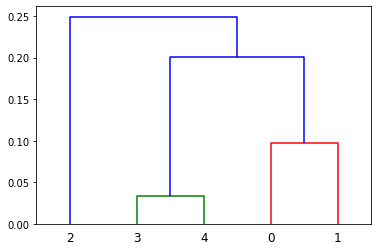

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(tf_idf, 'ward') # εκπαιδεύει τον αλγόριθμο
dendrogram(Z) # σχεδιάζει ένα δενδρόγραμμα με το αποτέλεσμα του ιεραρχικού αλγορίθμου
print

Παρατηρούμε ότι οι προτάσεις που βρίσκονται κοντά μεταξύ τους καταλήγουν και σε κοινά cluster. Θα προσπαθήσουμε να εφαρμόσουμε την τεχνική αυτή και σε ένα πραγματικό πρόβλημα με αληθινά κείμενα.



### 20 Newsgroups dataset

Ως πραγματικό παράδειγμα θα χρησιμοποιήσουμε το [20 Newsgroups](http://qwone.com/~jason/20Newsgroups/) dataset, το οποίο υπάρχει και μέσα στο [sklearn](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html). Για το clustering θα χρησιμοποιήσουμε τον ιεραρχικό αλγόριθμο που μελετήσαμε προηγουμένως.

In [0]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all')

To 20 newsgroups είναι και αυτό ένα dataset για κατηγοριοποίηση ή ομαδοποίηση κειμένων. Τυπώνουμε τις κατηγορίες των κειμένων:

In [0]:
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Θα πάρουμε 3 κατηγορίες από το dataset αυτό και θα δημιουργήσουμε ένα corpus με τα πρώτα 5 κείμενα από κάθε κατηγορία. Για ευκολία θα επιλέξουμε 3 αρκετά ξεκάθαρες μεταξύ τους κατηγορίες.

In [0]:
import functools

categ = ['alt.atheism', 'comp.graphics', 'rec.sport.baseball']
data = functools.reduce(lambda x,y: x+y, [fetch_20newsgroups(categories=[x], remove=('headers', 'footers'))['data'][:5] for x in categ])
print('Input shape:', len(data), '\n')
print(data[0][:1000])
print("-----")
print(data[13][:1000])

Input shape: 15 

In <16BA7103C3.I3150101@dbstu1.rz.tu-bs.de> I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau) writes:

>In article <1993Apr5.091258.11830@monu6.cc.monash.edu.au>
>darice@yoyo.cc.monash.edu.au (Fred Rice) writes:
> 
>(Deletion)
>>>>Of course people say what they think to be the religion, and that this
>>>>is not exactly the same coming from different people within the
>>>>religion.  There is nothing with there existing different perspectives
>>>>within the religion -- perhaps one can say that they tend to converge on
>>>>the truth.
>>
>>>My point is that they are doing a lot of harm on the way in the meantime.
>>>
>>>And that they converge is counterfactual, religions appear to split and
>>>diverge. Even when there might be a 'True Religion' at the core, the layers
>>>above determine what happens in practise, and they are quite inhumane
>>>usually.
>>>
> 
>What you post then is supposed to be an answer, but I don't see what is has
>got to do with what I say.
> 
>I will re

Σημειώστε εδώ ότι με το να πετάμε τους πολύ σπάνιους όρους ξεφορτωνόμαστε διάφορα σπάνια strings όπως emails, τυπογραφικά λάθη, "παράξενα" σύμβολα κλπ


### TfidfVectorizer και μείωση της διαστατικότητας του VSM

Για την προεπεξεραγασία των αρχείων θα χρησιμοποιήσουμε τη συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) του sklearn. Η συγκεκριμένη συνάρτηση έχει τη δυνατότητα να υποστηρίξει και όλη την [προεπεξεργασία](http://scikit-learn.org/stable/modules/feature_extraction.html#customizing-the-vectorizer-classes) που κάναμε προηγουμένως (stopwords, stemming, lematizing, κτλ). Επίσης δέχεται και πολλές επιπλέον παραμέτρους όπως την `max_df=x` η οποία αγνοεί τους όρους που εμφανίζονται σε ποσοστό `x` των κειμένων και πάνω  (δηλ. λέξεις πολύ συχνές στο συγκεκριμένο σύνολο κειμένων), και την `min_df=y` η οποία αγνοεί τους όρους οι οποίοι εμφανίζονται σε ποσοστό μικρότερο από `y` του συνόλου των κειμένων (δηλ. πολύ σπάνιοι όροι). Για το παρακάτω παράδειγμα δεν θα εφαρμόσουμε stemming ή lemmatizing καθώς δεν βοηθάει στη συγκεκριμένη περίπτωση.

Dimensions before optimizing TfidfVectorizer parameters
TF-IDF array shape: (15, 1232)
Dimensions after optimizing TfidfVectorizer parameters
TF-IDF array shape: (15, 124)


<function print>

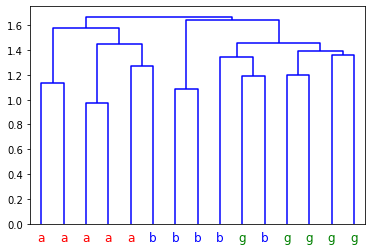

In [0]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

print("Dimensions before optimizing TfidfVectorizer parameters")
vectorizer = TfidfVectorizer()
tf_idf_array = vectorizer.fit_transform(data).toarray() # επιστρέφει sparse matrix, γι'αυτό το κάνουμε .toarray()
print('TF-IDF array shape:', tf_idf_array.shape)

print("Dimensions after optimizing TfidfVectorizer parameters")
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
tf_idf_array = vectorizer.fit_transform(data).toarray() # επιστρέφει sparse matrix, γι'αυτό το κάνουμε .toarray()
print('TF-IDF array shape:', tf_idf_array.shape)
Z = linkage(tf_idf_array, 'ward')

labels = ['a'] * 5 + ['g'] * 5 + ['b'] * 5 # 'a' = atheism, 'g' = graphics, 'b' = baseball 

dendrogram(Z, labels=labels, color_threshold=0)

colors = {'a':'r', 'g':'g', 'b':'b'}
for l in plt.gca().get_xticklabels():
    l.set_color(colors[l.get_text()])
print

Παρατηρούμε ότι όντως τοποθετεί με αρκετά καλή ακρίβεια τα κλαδιά που περιέχουν κείμενα από την ίδια κατηγορία. Επίσης ο αλγόριθμος αυτός μπορεί να εντοπίσει και ιεραρχίες εντός της κάθε ομάδας. (Σημ. σε ένα πραγματικό unsupervised πρόβλημα τα χρώματα και τα label στον άξονα x **δεν** είναι διαθέσιμα).



Σημειώστε επίσης την τεράστια επίδραση στις διαστάσεις των διανυσμάτων (το 1/10) που έχουν οι παράμετροι του  TfidfVectorizer. Στην πράξη προσπαθούμε να μικρύνουμε όσο γίνεται τις διαστάσεις μέχρι το σημείο που αρχίζει να πέφτει η ποιότητα (της κατηγοριοποίησης, του clustering κοκ).



### k-Means και αριθμός clusters

Θα δοκιμάσουμε επίσης για το ίδιο πρόβλημα και τον **k-means**, σε περισσότερα κείμενα. Πρώτα φορτώνουμε τα κείμενα...

In [0]:
categ = ['alt.atheism', 'comp.graphics', 'rec.sport.baseball']
data = functools.reduce(lambda x,y: x+y, [fetch_20newsgroups(categories=[x], remove=('headers', 'footers'))['data'][:100] for x in categ])
print('Σύνολο κειμένων:', len(data))

Σύνολο κειμένων: 300


Στη συνέχεια εφαρμόζουμε την προεπεξεργασία και τρέχουμε τον k-means για διάφορα k για να βρούμε το βέλτιστο.

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
tf_idf_array = vectorizer.fit_transform(data)

silhouette_scores = []
for k in range(2, 10):
    km = KMeans(k)
    preds = km.fit_predict(tf_idf_array)
    silhouette_scores.append(silhouette_score(tf_idf_array, preds))

Σχεδιάζουμε τη γραφική του silhouette και βρίσκουμε το βέλτιστο k. Αυτό αντιπροσωπεύει τον αριθμό των κατηγοριών στις οποίες ανήκουν τα κείμενά μας.

Maximum average silhouette score for k = 3


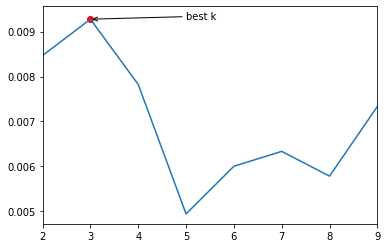

In [0]:
plt.plot(range(2, 10), silhouette_scores)
best_k = np.argmax(silhouette_scores) + 2 # +2 γιατί ξεκινάμε το range() από k=2 και όχι από 0 που ξεκινάει η αρίθμηση της λίστας
plt.scatter(best_k, silhouette_scores[best_k-2], color='r') # για τον ίδιο λόγο το καλύτερο k είναι αυτό 2 θέσεις παρακάτω από το index της λίστας
plt.xlim([2,9])
plt.annotate("best k", xy=(best_k, silhouette_scores[best_k-2]), xytext=(5, silhouette_scores[best_k-2]),arrowprops=dict(arrowstyle="->")) # annotation
print('Maximum average silhouette score for k =', best_k)

Με το κριτήριο silhouette βρήκαμε 3 cluster στα κείμενά μας, όσες κατηγορίες είχαμε και αρχικά.
Ας εκτυπώσουμε τις ετικέτες που μας δίνει ο k-means:

In [0]:
km = KMeans(best_k)
km.fit(tf_idf_array)
print(km.labels_)

[1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 1 1 2 1 1 1 1 1 2
 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0
 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 2 0 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 0 2 2 2]


Ξέρουμε ότι στο σύνολό μας, τα πρώτα 100 κείμενα ανήκουν στην 1η κατηγορία, τα επόμενα 100 στη δεύτερη, κτλ. Από τις παραπάνω προβλέψεις βλέπουμε ότι τα έχει πάει αρκετά καλά ο k-means. Σημειώστε ότι το label δεν έχει σημασία. 
Για να δούμε για ποιο πράγμα μιλάει η κάθε κατηγορία, μπορούμε να βρούμε τους top όρους για κάθε ομάδα.

In [0]:
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(best_k):
    out = "Cluster %d:" % i
    for ind in order_centroids[i, :20]:
        out += ' %s' % terms[ind]
    print(out)

Cluster 0: image graphics thanks files know hi program file appreciated use card mail software images looking email color vga information line
Cluster 1: god edu people think don article atheism religion believe say exist atheists wrong does islam just com bible objective know
Cluster 2: edu baseball year game article good team like just games com better does hitter players time don know season hit


Οι όροι βλέπουμε ότι έχουν όντως σχέση με το περιεχόμενο των κειμένων. Μπορούμε να τυπώσουμε και περισσότερα clusters και να διαπιστώσουμε ότι και αυτά έχουν σημασιολογική συνοχή.

In [0]:
km = KMeans(10)
km.fit(tf_idf_array)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    out = "Cluster %d:" % i
    for ind in order_centroids[i, :20]:
        out += ' %s' % terms[ind]
    print(out)

Cluster 0: edu maine list salaries stanford hitter hand grand article fans dan mailing don phillies played wagner oz sandberg leland know
Cluster 1: scott files pov com temp cview good question edu baseball point comp mail ve use hdf create tiff don graphics
Cluster 2: edu god article psuvm colorado james david atheism just 1993 watch psu does nasa maybe baseball bsa mean help request
Cluster 3: thanks cubs advance line graphics subject gov does mail hi know says game address jewish texas gl runs driver john
Cluster 4: year team games game clemens edu points better pitching season sox braves alomar new good win baseball players winning article
Cluster 5: god exist existence think universe believe atheism com satan earth nature faith statement bible does atheist gods edu motto means
Cluster 6: people don edu just think morality objective religion say mathew keith moral war like know atheists wouldn does liar said
Cluster 7: image program graphics images package version software file inf

Σημειώστε ότι η παρουσία διάφορων όρων όπως edu, use, thanks που είτε υπάρχουν παντού είτε έχουν προφανώς μικρή σημασιολογική αξία, δείχνει ότι θα μπορούσαμε να κάνουμε ακόμα καλύτερη προεπεξεργασία και διανυσματική αναπαράσταση. 